# Author: Mihir Thakkar

### Task 1 - Predict Percentage of the student based on the number of hours of study

##### Dataset link: http://bit.ly/w-data

###### Question: What will be predicted score if a student studies for 9.25 hrs/ day?

##### Importing Basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##### Import ML Libraries

In [117]:
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

##### Loading the dataset

In [8]:
path = "C:/Users/miihi/Data/Sparks Foundation/Student.xlsx"
df = pd.read_excel(path)
print("Data Imported Successfully")

Data Imported Successfully


##### First five rows of the data

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


##### Last five rows of the data

In [9]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


##### Checking Data information and statistical values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##### Shape of the dataset

In [11]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 25
Number of columns: 2


##### Lets make a 2D plot to visually see  if there's any correlation between the feature and the targert column

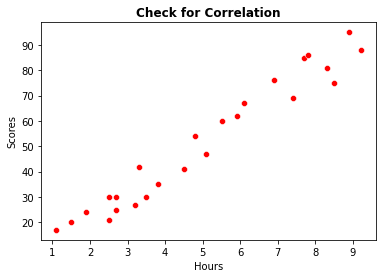

In [25]:
sns.scatterplot(x=df.Hours, y=df.Scores,color="red")
plt.title("Check for Correlation", fontweight = "bold")
plt.show()

#### We se a strong positive correlation between the hours and the scores

##### Seperating the feature and the target columns

In [80]:
Y = df.Scores
X = df.drop("Scores", 1)
print("Top 5 rows of X: \n",X.head())


Top 5 rows of X: 
    Hours
0    2.5
1    5.1
2    3.2
3    8.5
4    3.5


In [81]:
print("Top 5 rows of Y: \n", Y.head())

Top 5 rows of Y: 
 0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64


##### Split the data in train and test

In [104]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state =1)

##### Checking the shape of training and the testing data

In [105]:
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (17, 1)
Shape of x_test: (8, 1)
Shape of y_train: (17,)
Shape of y_test: (8,)


##### Model Training

In [106]:
model = LinearRegression().fit(x_train, y_train)
print("Training Complete")

Training Complete


##### Slope and Intercept

In [107]:
a = model.intercept_
b = model.coef_
print(f"Intercept: {np.round(a, 4)}")
print(f"Coefficient: {np.round(b, 4)}")

Intercept: -1.5123
Coefficient: [10.4108]


##### Regression Line

In [108]:
line = a + b*X

##### Plotting the Regression line and the data

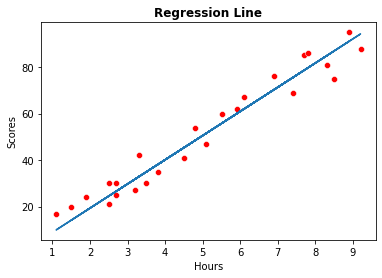

In [109]:
sns.scatterplot(x = X.Hours, y = Y, color = 'red')
plt.plot(X, line)
plt.title("Regression Line", fontweight = "bold")
plt.show()

##### Prediction and Residuals
###### Comparing Actual data vs Predicted values

In [110]:
y_pred = model.predict(x_test)

pred_df = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred, 'Residuals': y_test - y_pred})
pred_df

,Actual,Predicted,Residuals
14,17,9.939530,7.060470
13,42,32.843201,9.156799
17,24,18.268138,5.731862
3,75,86.979152,-11.979152
21,54,48.459341,5.540659
10,85,78.650544,6.349456
18,67,61.993329,5.006671
19,69,75.527316,-6.527316


##### Lets check our model by using an unknown value of the X variable

In [125]:
hrs = 9.25
pred_score = a + b * hrs
print(f"For {hrs} hours predicted percentage is : {np.round(pred_score, 2)}%")

For 9.25 hours predicted percentage is : [94.79]%


##### Model Performance Evaluation

In [121]:
print("Mean Absolute Error :", np.round(mae(y_test, y_pred), 2))
print("Mean Square Error :", np.round(mse(y_test, y_pred), 2))
print("Root Mean Square Error :", np.round(np.sqrt(mse(y_test, y_pred)), 2))
print("R2_Score :", np.round(r2(y_test, y_pred),2))

Mean Absolute Error : 7.17
Mean Square Error : 56.09
Root Mean Square Error : 7.49
R2_Score : 0.89


##### An R2_Score of 0.89 indicates that approx 89% of variation is explained by the model.


# Thank You - The Sparks Foundation